# ***Chinese News articles classification***
- #### In this notebook, I have tried to implement some of the effective NLP techniques to built document classification model based on few traditional approaches(*`SVM, naive bayes`*), and some recent ones(*`LSTM, Bidirectional LSTM, BERT(base-ucased, base-multilingual, base-chinese`*))<br>

### *Challenges in chinese text classification wrt english text.*
- One of the *differences* between Chinese and English is that **Chinese is written in characters**. The characters in Chinese represent ***`meaning(s) of an idea`*** but they ***usually do `not` tell you how to pronounce the character***, that means `Chinese characters store ideas` while `English phrases store pronunciation`.
- Chinese text ***does't have spaces*** in between charaters, text is just a set of charaters giving you intuation thoughts or ideas.
- This leads to the problem that, chinese text ***can't be directly tokenized*** based on characters. 
- ***Text cleaning becomes tough*** as, I don't understand chinese text/ can't read it.
- All characters are unicodes. I have treated all the characters as unicodes throughout the experiment.
- Traditional NLP approaches that are fulfilled by famous libraries like nltk, spacy, etc. does't work well for chinese text as these libraries were built by english developers and were focused to solve problems in english language.

### Use of ***jieba***
- `jieba` is the best `chinese text segmentation module`, more specificaly it is ***chinese word segmentation*** library!
- I have used this library to split the *'text'* column(contains news articles), into *chinese words*(more specifically sentences).
- I have `cleaned the text` using the same library, to get rid of *chinese stopwords, punctuations, and other unnecesary text*.
- Implemented all the steps in one function to get a *cleaned chinese text* which is also `space seperated` and having words.

### Models:
- Built a Support Vector machine classifier using CountVectorizer and TfIdfVectorizers with unigrams, as bigrams or multiple sets of vectors taken together doesn't make sense for chinese text.
- Similar to SVC, also successfully built Naive bayes classifier.
- Advanced sequence models(RNN models) like LSTM and bidirectional LSTM are also implementd, and used tensorflows tokenizer to tokenize elements in the text.
- Implemented Bert, tokenized chinese news text into using Bert's pretrained tokenizers such as `'bert-base-uncased', 'bert-multilingual-cased'(trained on 104 languages), 'bert-base-chinese'`


In [1]:
# importing libraries to load data, and data manipulation
import pandas as pd
import numpy as np
import os

# libraries for data visualization
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading 'train_data.csv'

df = pd.read_csv('train_data.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,text,category
0,﻿ 日月 光华 - - Traffic _ Info 精华区 文章 阅读- - - ...,traffic
1,﻿ 日本 去年 海外 资产 和 负债额 均 创 ...,economic
2,﻿ 梁斌 黄胄 联袂 在 京 举办 画展新华社 ...,art
3,﻿ 记者来信 ： 乱 降价 也 有害新华社 北京...,economic
4,﻿ 巴解 愿同 叙利亚 和解新华社 开罗 ５ 月...,politics


> **Number of rows and columns in the dataset**

In [3]:
print(f"Rows: {df.shape[0]}, Cols: {df.shape[1]}")

Rows: 2500, Cols: 2


> **Null values analysis**

In [4]:
print(f"Number of empty 'text': {df['text'].isnull().sum()}")
print(f"Number of empty 'category': {df['category'].isnull().sum()}")

Number of empty 'text': 0
Number of empty 'category': 0


> **Distribution of the categories in the target variable (news category)**

Text(0.5, 1.0, 'Category %')

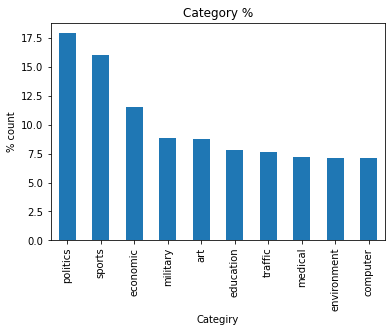

In [5]:
cat_percent = df['category'].value_counts()/len(df) *100
cat_percent.plot(kind='bar')
plt.xlabel('Categiry')
plt.ylabel('% count')
plt.title('Category %')

In [6]:
# sample news text in chinese
df.iloc[0].text

'\ufeff 日月 光华   - -   Traffic _ Info 精华区 文章 阅读- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -发信人 :   RaoRen   ( 亮马 ？ 亮马 ！ ) ,   信 区 :   Traffic _ Info标     题 :   中华人民共和国 公路 管理条例发信站 :   日月 光华   ( 2002 年 09 月 10 日 17 : 58 : 59   星期二 ) ,   站 内 信件中华人民共和国 公路 管理条例栏目 类型 ： 综合性 法规   加入 时间 ： 2001 年 12 月 1 日 14 : 0中华人民共和国 公路 管理条例（ １ ９ ８ ７ 年 １ ０ 月 １ ３ 日 国务院 发布 ）第一章   总则第一条   为 加强 公路 的 建设 和 管理 ， 发挥 公路 在 国民经济 、 国防 和 人民 生活 中 的 作用， 适应 社会主义 现代化 建设 的 需要 ， 特 制定 本 条例 。第二条   本 条例 适用 于 中华人民共和国 境内 的 国家 干线 公路 （ 以下 简称 国道 ） ， 省自治区 、   直辖市 干线 公路 （ 以下 简称 省 道 ） ，   县 公路 （ 以下 简称 县 道 ） ， 乡 公路 （ 以下简称 乡道 ） 。本 条例 对 专用 公路 有 规定 的 ， 适用 于 专用 公路 。第三条   中华人民共和国 交通部 主管 全国 公路 事业 。第四条   公路 管理工作 实行 统一 领导 、 分级管理 原则 。国道 、 省道 由省 、 自治区 、 直辖市 公路 主管部门 负责 修建 、 养护 和 管理 。国道 中 跨省 、 自治区 、 直辖市 的 高速公路 ， 由 交通部 批准 的 专门机构 负责 修建 、 养护 和管理 。县道 由 县 （ 市 ） 公路 主管部门 负责 修建 、 养护 和 管理 。乡道 由 乡 （ 镇 ） 人民政府 负责 修建 、 养护 和 管理 。专用 公路 由 专用 单位 负责 修建 、 养护 

> The text given in chinese is completely made up of unicode characters, also contains some english words and numbers.<br>
> Data cleaning is the next step

In [7]:
# !pip install jieba

In [8]:
# libraries for cleaning chinese and english text
import jieba
import re
import string

In [9]:
# Cleaning text, segmentation of chinese text using jieba 

def clean_text(text:str) -> str:
    '''
    Function to clean the given text.
    Takes text and cleans is wrt stopwords, segmentation, redundant information.
        Parameters:
            text (str) :: Sequence of chinese characters
            
    Returns clean segmented chinese text
    '''
    text = remove_chinese_stopwords(remove_nm_enpnc(remove_chinese_punc(text[1:].strip())))
    text = jieba_cut(text, ' ').split()
    return ' '.join(text)

# chinese word segmentation
def jieba_cut(x:str, sep:str=' ') -> str:
    """
    Takes normal chinese text, to return segmented text.
        Parameters:
            x (str) :: Chinese text
            sep (str) :: Desired seperation key-character
    
    Returns segmented words with specified sepration.
    """
    return sep.join(jieba.cut(x, cut_all=False))

# remove chinese puctuation 
def remove_chinese_punc(text:str) -> str:
    """
    Removes chinese punctuations from the given text.
        Parameters:
            text (str) :: Chinese text
            
    Returns punctuation less chinese text
    """
    punc = "！？｡。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］·＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.０１２３４５６７８９"
    return re.sub(r"[%s]+" %punc, "", text)

# remove numbers and english pucts
def remove_nm_enpnc(text:str) -> str:
    """
    Removes english numbers and puctuations.
        Parameters:
            text (str) :: Chinese text
            
    Returns english punctuation and numbers less chinese text
    """
    exclude = set(string.punctuation)
    text = re.sub(r'[0-9]', '', text)
    text = ''.join(ch for ch in text if ch not in exclude)
    return text

# remove chinese stopwords
# These chinese stopwords are taken from jieba repo -> stopwords 
def remove_chinese_stopwords(text:str) -> str:
    """
    Function to remove Chinese stopwords.
    These stopwords are taken from jieba repo.
        Parameters:
            text (str) :: Chinese text
            
    Returns chinese stopowords-less text
    """
    jieba_stop_words = ['的','了','和','是','就','都','而','及','與','著','或','一個','沒有','我們','你們','妳們','他們','她們','是否']    
    return ''.join(ch for ch in text if ch not in jieba_stop_words)
    

    
# checking some lengths to ensure there is cleaning done.

rpc = remove_chinese_punc(df['text'][1][1:].strip())
rni = remove_nm_enpnc(rpc)
jsw = remove_chinese_stopwords(rni)
jc = jieba_cut(jsw, ' ')
print(len(jc))
print(len(rpc))
print(len(rni))
print(len(jsw))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.678 seconds.
Prefix dict has been built successfully.


694
420
420
408


> Let's see some unicodes for chinese language

In [10]:
'８'.encode("unicode_escape")
# '\uFF16'  -> '６'

b'\\uff18'

In [11]:
# difference between normal english number 5 and some chinese character ５, which is actually unicode uX'FF15'
# ５ 5 

In [12]:
# length of given text at index 1, in the dataframe
len(df['text'][1])

506

In [13]:
# lengths for df['text'][1]
# 482 #normal
# 1198 #jc
# 1178 #jc+rp
# 462 #rp

In [14]:
# Actuall text
df['text'][1]

'\ufeff                       日本 去年 海外 资产 和 负债额 均 创 历史纪录新华社 东京 ５ 月 ２ ５ 日电 日本 内阁 今天 发表 的 一份 报告书 表明 ， 去年 日本 海外 资产额 和 外债 额均 创 历史 最高 纪录 。去年 日本 海外 资产额 已达 １ · ７ ７ １ 万亿美元 ， 比 １９ ８ ８ 年 增加 百分之二十点 五 。 海外 资产 中 增加 最快 的 是民间 部门 的 直接 投资 。 在 制造业 方面 ， 日本 由于 大量 购买外国 的 不动产 和 在外 办厂 等 ， 资产额 比 １ ９ ８ ８ 年 增加 百分 之 三十九点 三 ， 达 １ ５ ４ ３ 亿美元 。去年 日本 对外 负债额 为 １ · ４ ７ ７ ７ 万亿美元 ， 比上年 增加 百分之二十五 点五 。因而 ， 日本 去年 海外 纯 资产额 为 ２ ９ ３ ２ · １ ５ 亿美元 ， 连续 ５ 年 居 世界 首位 。 但是 ， 由于 外债 增加 ， 比 上年增长速度 仅为 百分之零点 五 。 而 １ ９ ８ ８ 年 比 １ ９ ８ ７ 年的 增长率 达 百分之二 十一点二 。 （ 完 ）'

> Make new feature (column) named as 'text_cut'

In [15]:
# new feature 'text_cut', will contain clean text

# df['text_cut'] = [clean_text(text) for text in df['text']]
df['text_cut'] = df.text.apply(clean_text)        #faster method as compared to above given list comprehension
df.head()

,text,category,text_cut
0,﻿ 日月 光华 - - Traffic _ Info 精华区 文章 阅读- - - ...,traffic,日月 光华 Traffic Info 精华区 文章 阅读 发信人 RaoRen 亮马 亮马 ...
1,﻿ 日本 去年 海外 资产 和 负债额 均 创 ...,economic,日本 去年 海外 资产 负债额 均 创 历史纪录 新华社 东京 月 日电 日本 内阁 今天 ...
2,﻿ 梁斌 黄胄 联袂 在 京 举办 画展新华社 ...,art,梁斌 黄胄 联袂 在 京 举办 画展 新华社 北京 月 日电 记者 尹鸿祝 河北省 蠡县 梁...
3,﻿ 记者来信 ： 乱 降价 也 有害新华社 北京...,economic,记者来信 乱 降价 也 有害 新华社 北京 月 日电 记者来信 乱 降价 也 有害 新华社 ...
4,﻿ 巴解 愿同 叙利亚 和解新华社 开罗 ５ 月...,politics,巴解 愿同 叙利亚 解 新华社 开罗 月 日电 巴勒斯坦解放组织 主席 阿拉法特 高级顾问 ...


In [16]:
# length comparision for original and processed text, when we split the text.

print(len(df['text'][1].split()), len(df['text_cut'][1].split()))

176 113


In [17]:
# length comparision without splitting

len(df['text'][1]), len(df['text_cut'][1]), len(df['text_cut'][1])

(506, 346, 346)

> **Visualizing most frequently used words in the given text columns**

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [19]:
# downloading font used to display chinese characters in charts/pictures/graphs
# !wget https://github.com/adobe-fonts/source-han-sans/raw/release/SubsetOTF/SourceHanSansCN.zip
# !unzip -j "SourceHanSansCN.zip" "SourceHanSansCN/SourceHanSansCN-Regular.otf" -d "."
# !rm SourceHanSansCN.zip
# !ls

import matplotlib.font_manager as fm
font_path = './SourceHanSansCN-Regular.otf'

prop = fm.FontProperties(fname=font_path, size=20)

In [20]:
def show_wordcloud(data:str, font_path:str=font_path, title:str = None) -> plt:
    """
    Plots the wordcloud for given data.
        Parameters:
            data (str) :: can be sequence of texts like list, arrays, pandas Series, etx.
            font_path (str) :: specify font which you want to display 
            title (str) :: Title to the wordcloud
    
    Returns Nothing
    """
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        font_path=font_path,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        prop = fm.FontProperties(fname=font_path)
        fig.suptitle(title, fontsize=20, fontproperties=prop)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

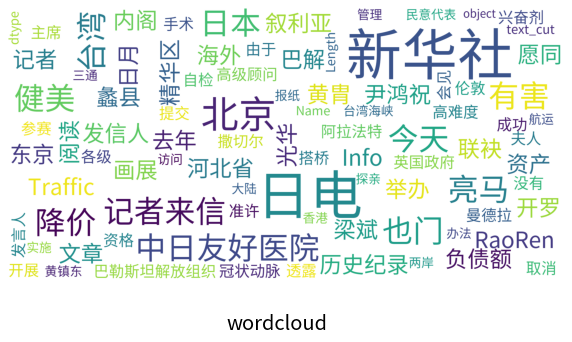

In [21]:
# wordcloud for newly made feature of clean data

show_wordcloud(df['text_cut'], font_path, title='wordcloud')

In [22]:
# unique category list 

df.category.unique()

array(['traffic', 'economic', 'art', 'politics', 'medical', 'computer',
       'military', 'sports', 'education', 'environment'], dtype=object)

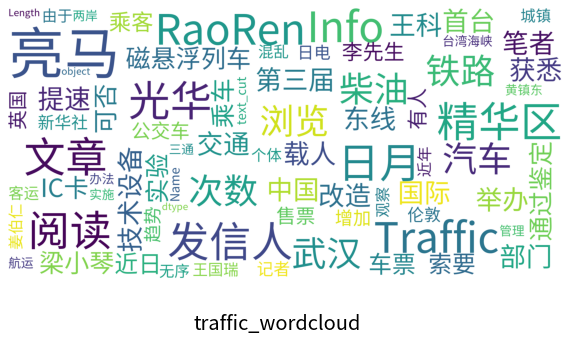

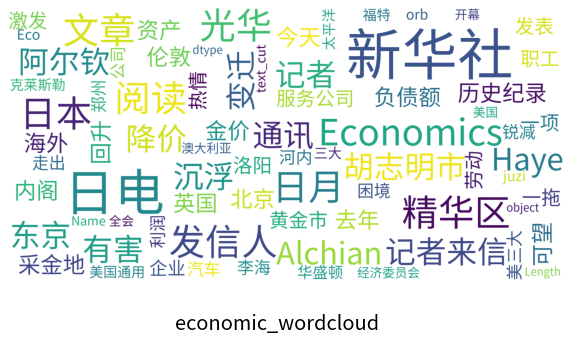

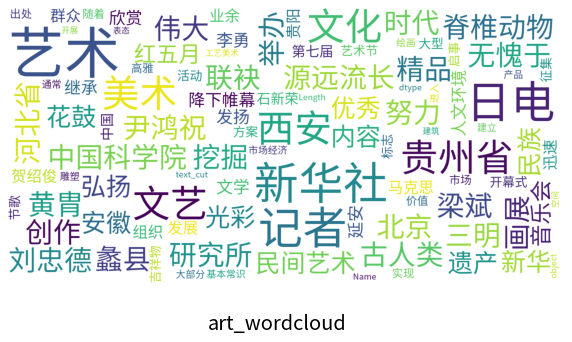

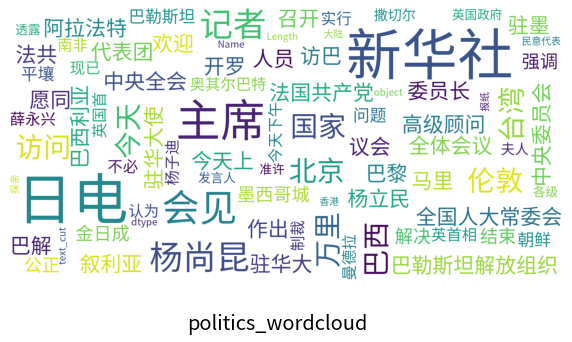

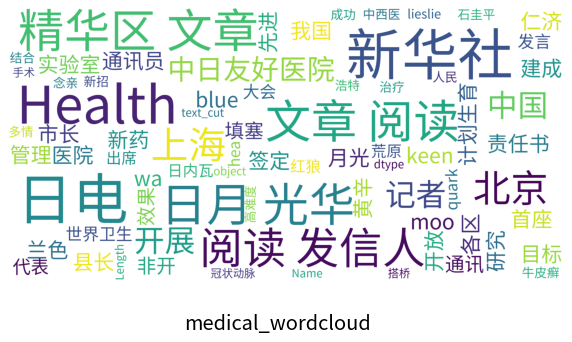

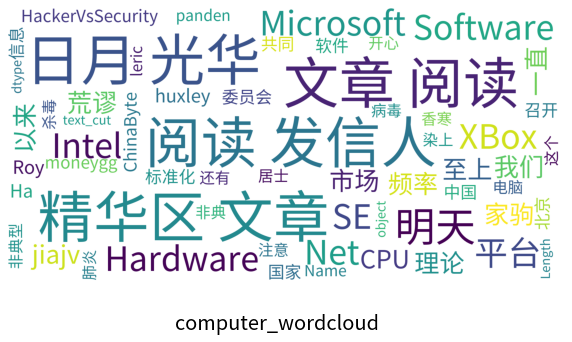

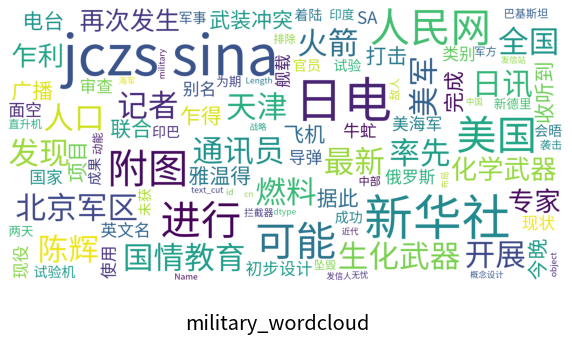

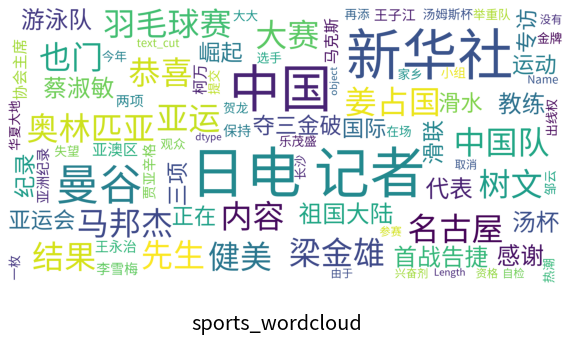

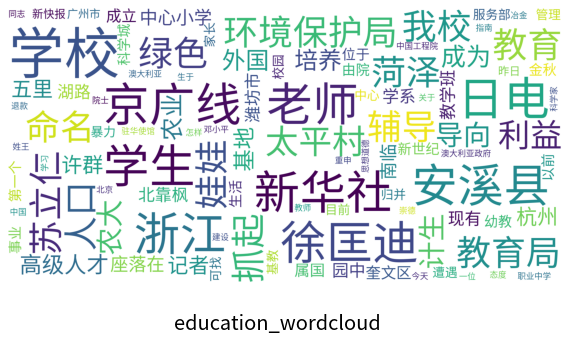

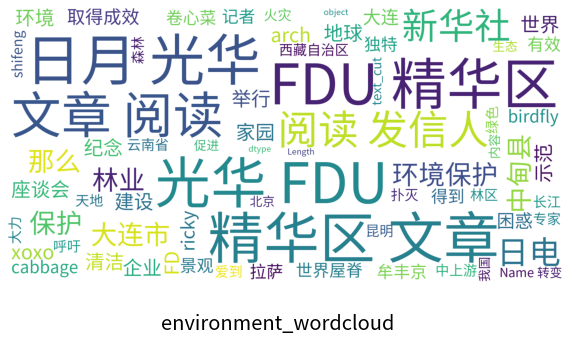

In [23]:
# plotting wordcloud of news in chinese for each given category.

for category in df.category.unique():
    df_cat = df.loc[df.category == category]
    show_wordcloud(df_cat['text_cut'], font_path, title=category+'_wordcloud')

In [24]:
# df['text'][1].split(),df['text_cut'][1]
df.columns
list(df.category.unique())

['traffic',
 'economic',
 'art',
 'politics',
 'medical',
 'computer',
 'military',
 'sports',
 'education',
 'environment']

> Convering categorical labels into ***numeric values*** to make machine understand

In [25]:
df['label']=df['category'].apply(list(df.category.unique()).index)
df.head()

,text,category,text_cut,label
0,﻿ 日月 光华 - - Traffic _ Info 精华区 文章 阅读- - - ...,traffic,日月 光华 Traffic Info 精华区 文章 阅读 发信人 RaoRen 亮马 亮马 ...,0
1,﻿ 日本 去年 海外 资产 和 负债额 均 创 ...,economic,日本 去年 海外 资产 负债额 均 创 历史纪录 新华社 东京 月 日电 日本 内阁 今天 ...,1
2,﻿ 梁斌 黄胄 联袂 在 京 举办 画展新华社 ...,art,梁斌 黄胄 联袂 在 京 举办 画展 新华社 北京 月 日电 记者 尹鸿祝 河北省 蠡县 梁...,2
3,﻿ 记者来信 ： 乱 降价 也 有害新华社 北京...,economic,记者来信 乱 降价 也 有害 新华社 北京 月 日电 记者来信 乱 降价 也 有害 新华社 ...,1
4,﻿ 巴解 愿同 叙利亚 和解新华社 开罗 ５ 月...,politics,巴解 愿同 叙利亚 解 新华社 开罗 月 日电 巴勒斯坦解放组织 主席 阿拉法特 高级顾问 ...,3


> **Splitting dataframe into training and test data.**
> - Training is done on the training data.
> - Models are tested on this test data later

In [26]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.05, random_state = 42)    # 5% of total data resered for testing

In [27]:
# training and testing data shapes

print(f"train: {train_df.shape}, test: {test_df.shape}")

train: (2375, 4), test: (125, 4)


> **Histogram for getting distribution of lengths of cleaned news**
> - It can be seen that `most of the texts are of length less than 500`
> - I have seleced **500 and numbers around it**, to be my `sequence length` for all texts for further modeling

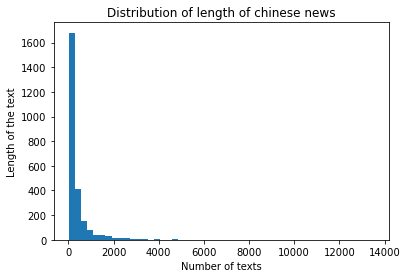

In [28]:
plt.hist([len(x.split()) for x in df['text_cut']], bins=50)
plt.title('Distribution of length of chinese news')
plt.ylabel('Length of the text')
plt.xlabel('Number of texts')
plt.show()

In [29]:
# amnual length analysis 

def less_than(th:int) -> str:
    """
    Function to analyze number of reviews with length less than 'th'
    Parameters:
        th (int) :: Length threshold
    """
    less = []
    for x in df['text_cut']:
        if len(x.split())<th:
            less.append(1)
    print(f'less than {th}:',sum(less))

In [30]:
# number of texts with text length less than 450

less_than(450)

less than 450: 1991


> **Vectorization of the text**

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import time

In [65]:
# Victorization fucntion, already capping the max_features to 450 as per our analysis

def count_vect_feature(feature, df, max_features=450):
    """
    Takes feature and data to return vectorized feature in the given data with
    maximum number of features equal to max_features.
    """
    start_time = time.time()
    cv = TfidfVectorizer(max_features=max_features,
                             ngram_range=(1, 1),)
    X_feature = cv.fit_transform(df[feature])
    print('Count Vectorizer `{}` completed in {} sec.'.format(feature, round(time.time() - start_time,2)))
    return X_feature, cv

In [66]:
X_text, cv = count_vect_feature('text_cut', train_df)
X_text

Count Vectorizer `text_cut` completed in 0.53 sec.


<2375x450 sparse matrix of type '<class 'numpy.float64'>'
	with 108530 stored elements in Compressed Sparse Row format>

In [70]:
X_text[0].toarray()   # every element of X_text is sparse matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08949128, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02851913,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.21836523,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0816747 ,
        0.        , 0.        , 0.        , 0.  

In [71]:
# see the feature names after vectorization, showing first 20 only to avoid use of large space

cv.get_feature_names()[:20]

['bbs',
 'cn',
 'cpu',
 'edu',
 'from',
 'fudan',
 'windows',
 '一个',
 '一些',
 '一定',
 '一批',
 '一样',
 '一次',
 '一直',
 '一种',
 '一般',
 '一页',
 '一项',
 '万元',
 '上海']

> **Split the train_df into training and validation data**

In [73]:
# splitting the training data into train and validation dataset
target = 'label'
X = X_text
y = train_df[target].values
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [74]:
type(y)

numpy.ndarray

In [77]:
# confirm our target labels

print(type(train_y[0]))
train_labels = np.asarray(train_y)
train_labels

<class 'numpy.int64'>


array([7, 6, 7, ..., 5, 7, 7])

In [78]:
# getting shapes for newly split data

train_X.shape, valid_X.shape, train_y.shape, valid_y.shape

((2137, 450), (238, 450), (2137,), (238,))

In [79]:
# libraries for modeling data using traditional techniques

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score
from sklearn.svm import SVC                   # Support Vector Machine Classifier
from sklearn.naive_bayes import MultinomialNB # Naive Bayes classifier

> ### **Support Vector Machine Classifier**

In [80]:
%%time
clf_svc = SVC(kernel='linear')
clf_svc = clf_svc.fit(train_X, train_y)

CPU times: user 688 ms, sys: 0 ns, total: 688 ms
Wall time: 686 ms


In [81]:
def show_confusion_matrix(valid_y, predicted, size=1, font_prop=prop, trim_labels=False) -> plt:
    """
    Plots a confution matrix heatmap.
    """
    mat = confusion_matrix(valid_y, predicted)
    plt.figure(figsize=(4*size, 4*size))
    f, ax = plt.subplots(1,1, figsize=(4*size,4*size))
    sns.set()
    target_labels = np.unique(valid_y)
    if(trim_labels):
        target_labels = [x[0:70] for x in target_labels]
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=target_labels,
                yticklabels=target_labels
               )
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop);
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop);
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

Valid:
Feature: label 	| Prediction accuracy: 0.8991596638655462
Feature: label 	| Prediction F1-score: 0.8994502527032422
Feature: label 	| Prediction recall: 0.8991596638655462


<Figure size 432x432 with 0 Axes>

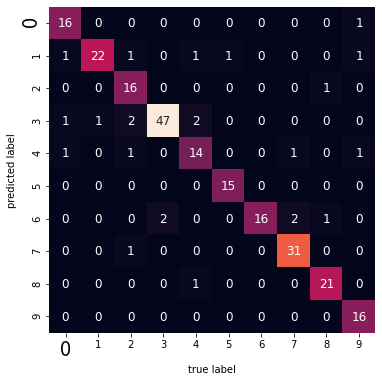

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.81      0.96      0.88        23
           2       0.94      0.76      0.84        21
           3       0.89      0.96      0.92        49
           4       0.78      0.78      0.78        18
           5       1.00      0.94      0.97        16
           6       0.76      1.00      0.86        16
           7       0.97      0.91      0.94        34
           8       0.95      0.91      0.93        23
           9       1.00      0.84      0.91        19

    accuracy                           0.90       238
   macro avg       0.90      0.89      0.89       238
weighted avg       0.91      0.90      0.90       238



In [82]:
# Results for the trainied svc model

predicted_valid = clf_svc.predict(valid_X)
prediction_acc = np.mean(predicted_valid == valid_y)
prediction_f1_score = f1_score(valid_y, predicted_valid, average='weighted')
prediction_recall = recall_score(valid_y, predicted_valid, average='weighted')
print("Valid:\n========================================================")
print(f"Feature: {target} \t| Prediction accuracy: {prediction_acc}")
print(f"Feature: {target} \t| Prediction F1-score: {prediction_f1_score}")
print(f"Feature: {target} \t| Prediction recall: {prediction_recall}")
show_confusion_matrix(valid_y, predicted_valid, font_prop=prop,size=1.5)
print(classification_report(valid_y, predicted_valid))

> ### **Naive Bayes Classifier**

In [83]:
%%time
clf_nb = MultinomialNB(fit_prior='true')
clf_nb = clf_nb.fit(train_X, train_y)

CPU times: user 3.56 ms, sys: 71 µs, total: 3.63 ms
Wall time: 2.67 ms


Valid:
Feature: label 	| Prediction accuracy: 0.8697478991596639
Feature: label 	| Prediction F1-score: 0.8667024494146215
Feature: label 	| Prediction recall: 0.8697478991596639


<Figure size 432x432 with 0 Axes>

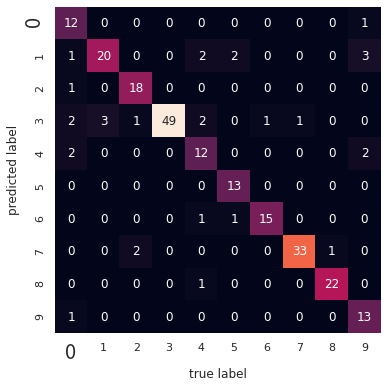

              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.71      0.87      0.78        23
           2       0.95      0.86      0.90        21
           3       0.83      1.00      0.91        49
           4       0.75      0.67      0.71        18
           5       1.00      0.81      0.90        16
           6       0.88      0.94      0.91        16
           7       0.92      0.97      0.94        34
           8       0.96      0.96      0.96        23
           9       0.93      0.68      0.79        19

    accuracy                           0.87       238
   macro avg       0.88      0.84      0.85       238
weighted avg       0.88      0.87      0.87       238



In [84]:
predicted_valid = clf_nb.predict(valid_X)
prediction_acc = np.mean(predicted_valid == valid_y)
prediction_f1_score = f1_score(valid_y, predicted_valid, average='weighted')
prediction_recall = recall_score(valid_y, predicted_valid, average='weighted')
print("Valid:\n========================================================")
print(f"Feature: {target} \t| Prediction accuracy: {prediction_acc}")
print(f"Feature: {target} \t| Prediction F1-score: {prediction_f1_score}")
print(f"Feature: {target} \t| Prediction recall: {prediction_recall}")
show_confusion_matrix(valid_y, predicted_valid, font_prop=prop,size=1.5)
print(classification_report(valid_y, predicted_valid))

> ### **Testing models on the test test created earlier**

In [85]:
X_test, cv = count_vect_feature('text', test_df)
y_test = test_df[target].values
y_test = np.asarray(y_test)

Count Vectorizer `text` completed in 0.05 sec.


Valid:
Feature: label 	| Prediction accuracy: 0.216
Feature: label 	| Prediction F1-score: 0.1954324176088882
Feature: label 	| Prediction recall: 0.216


<Figure size 432x432 with 0 Axes>

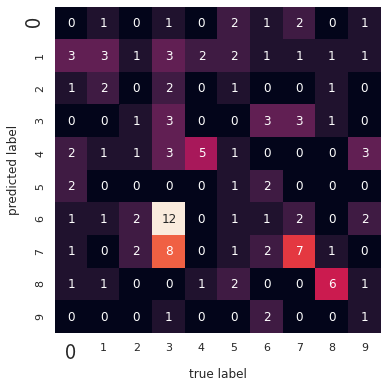

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.17      0.33      0.22         9
           2       0.00      0.00      0.00         7
           3       0.27      0.09      0.14        33
           4       0.31      0.62      0.42         8
           5       0.20      0.09      0.13        11
           6       0.05      0.08      0.06        12
           7       0.32      0.47      0.38        15
           8       0.50      0.60      0.55        10
           9       0.25      0.11      0.15         9

    accuracy                           0.22       125
   macro avg       0.21      0.24      0.20       125
weighted avg       0.22      0.22      0.20       125



In [86]:
predicted_valid = clf_nb.predict(X_test)
prediction_acc = np.mean(predicted_valid == y_test)
prediction_f1_score = f1_score(y_test, predicted_valid, average='weighted')
prediction_recall = recall_score(y_test, predicted_valid, average='weighted')
print("Valid:\n========================================================")
print(f"Feature: {target} \t| Prediction accuracy: {prediction_acc}")
print(f"Feature: {target} \t| Prediction F1-score: {prediction_f1_score}")
print(f"Feature: {target} \t| Prediction recall: {prediction_recall}")
show_confusion_matrix(y_test, predicted_valid, font_prop=prop,size=1.5)
print(classification_report(y_test, predicted_valid))

Valid:
Feature: label 	| Prediction accuracy: 0.208
Feature: label 	| Prediction F1-score: 0.21587222622382285
Feature: label 	| Prediction recall: 0.208


<Figure size 432x432 with 0 Axes>

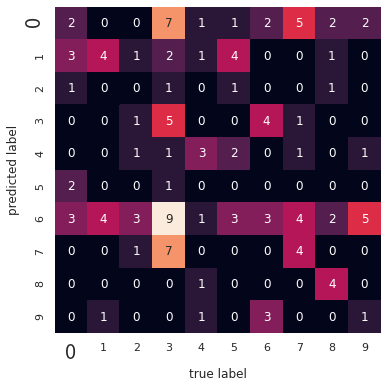

              precision    recall  f1-score   support

           0       0.09      0.18      0.12        11
           1       0.25      0.44      0.32         9
           2       0.00      0.00      0.00         7
           3       0.45      0.15      0.23        33
           4       0.33      0.38      0.35         8
           5       0.00      0.00      0.00        11
           6       0.08      0.25      0.12        12
           7       0.33      0.27      0.30        15
           8       0.80      0.40      0.53        10
           9       0.17      0.11      0.13         9

    accuracy                           0.21       125
   macro avg       0.25      0.22      0.21       125
weighted avg       0.29      0.21      0.22       125



In [87]:
predicted_valid = clf_svc.predict(X_test)
prediction_acc = np.mean(predicted_valid == y_test)
prediction_f1_score = f1_score(y_test, predicted_valid, average='weighted')
prediction_recall = recall_score(y_test, predicted_valid, average='weighted')
print("Valid:\n========================================================")
print(f"Feature: {target} \t| Prediction accuracy: {prediction_acc}")
print(f"Feature: {target} \t| Prediction F1-score: {prediction_f1_score}")
print(f"Feature: {target} \t| Prediction recall: {prediction_recall}")
show_confusion_matrix(y_test, predicted_valid, font_prop=prop,size=1.5)
print(classification_report(y_test, predicted_valid))

> Results
> - As we can see that both the model tend to overfit the training data slighly.
> - Not performing well on test set(unseen data)

In [337]:
test_df.category.value_counts()

politics       33
sports         15
military       12
traffic        11
computer       11
education      10
economic        9
environment     9
medical         8
art             7
Name: category, dtype: int64

In [88]:
# failures of model
clf_svc.predict(X_test[2]),y_test[2]

(array([6]), 7)

In [89]:
# failures of model
clf_svc.predict(X_test[0]),y_test[0]

(array([1]), 5)

> ### **LSTM - sequence based modeling**

In [28]:
# sequence models
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import regularizers, layers
from keras.callbacks import ModelCheckpoint
# fix random seed for reproducibility
np.random.seed(7)

In [29]:
df.head()

,text,category,text_cut,label
0,﻿ 日月 光华 - - Traffic _ Info 精华区 文章 阅读- - - ...,traffic,日月 光华 Traffic Info 精华区 文章 阅读 发信人 RaoRen 亮马 亮马 ...,0
1,﻿ 日本 去年 海外 资产 和 负债额 均 创 ...,economic,日本 去年 海外 资产 负债额 均 创 历史纪录 新华社 东京 月 日电 日本 内阁 今天 ...,1
2,﻿ 梁斌 黄胄 联袂 在 京 举办 画展新华社 ...,art,梁斌 黄胄 联袂 在 京 举办 画展 新华社 北京 月 日电 记者 尹鸿祝 河北省 蠡县 梁...,2
3,﻿ 记者来信 ： 乱 降价 也 有害新华社 北京...,economic,记者来信 乱 降价 也 有害 新华社 北京 月 日电 记者来信 乱 降价 也 有害 新华社 ...,1
4,﻿ 巴解 愿同 叙利亚 和解新华社 开罗 ５ 月...,politics,巴解 愿同 叙利亚 解 新华社 开罗 月 日电 巴勒斯坦解放组织 主席 阿拉法特 高级顾问 ...,3


In [30]:
# splitting into training and testing data

train_df, test_df = train_test_split(df, test_size=0.15,random_state=0)

In [31]:
# splitting train_df into training and validation dataset

lstm_train_X, lstm_valid_X, lstm_train_y, lstm_valid_y = train_test_split(train_df['text_cut'].tolist(),
                                                                         train_df['label'].tolist(),
                                                                         test_size = 0.15,
                                                                         stratify = train_df['label'].tolist(),
                                                                         random_state = 0)

# cross-check on one example
lstm_train_X[:1], lstm_train_y[:1]

(['福建省 百万 职工 献 计策 四年 创造 价值 亿元 新华社 福州 月 日电 记者 张瑞三 肖伦添 福建省 围绕 七五 计划 开展 百万 职工 献 计策 合理化 建议 活动 取得 显 着 经济效益 社会效益 据统计 年 多来 已有 万人次 提出 合理化 建议 万多件 其中 万多件 被 采纳 创造 价值 达 亿元 由 福建省 总工会 倡导 百万 职工 献 计策 活动 从 年 开始 为 切实 搞好 这项 活动 全省 各级 政府 成立 合理化 建议 技术 改进 活动 领导小组 一批 厂矿 企业 也 建立 合理化 建议 评审 委员会 认真 做好 评审 组织 实施 推广 奖励 等 工作 全省各地 广大职工 广泛 开展 起 我 为 企业 献一计 招贤 揭榜 Ｑ Ｃ 攻关 设备 会诊 等 多种形式 献计献策 活动 轰轰烈烈 百万 职工 献 计策 活动 给 企业 生产 带来 新气象 一批 由于 原材料 涨价 发生 困难 企业 度过 难关 一些 面临 困难 企业 摆脱 困境 引进 先进 技术 先进 设备 进行 技术改造 企业 在 原材料 零部件 模具 国产化 方面 闯 出 新路 不少 能耗 大户 制伏 电老虎 煤 老虎 油 老虎 降低 能耗 生产成本 一些 国家 重点 工程 大批 施工单位 实现 自我 武装 变外 包为 内包 节约 大量 投资 技改 经费 小 厂 小改 小革 也 出现 高质量 高效益 喜人 景象 福州 第二 化工厂 工业盐 过去 用车 运 每吨 运价 元 这个 厂 职工 经过 调查 研究 提出 改 车运 为 船运 建议 每吨 可 节约 运费 元 仅 这 一条 每年 为 工厂 节约 运费 万元 厦门 工程 机械厂 根据 工程师 李峰 建议 割除 轮式 装载机 中 多余 功能 每年 因此 可 节约 生产成本 万元 完'],
 [1])

In [32]:
for x in range(10):
    print(len(lstm_train_X[x]))

768
465
1794
820
1580
313
482
1253
124
683


In [33]:
# calculate vocabulary size in the dataset

vocab = []
for x in train_df['text_cut']:
    vocab.append(x.split())
    
vocab = [item for sublist in vocab for item in sublist]
print('Total number of chinese words in entire dataset:',len(vocab))
vocab = set(vocab)
print('Vocabulary Size:',len(vocab))
vocab_size = len(vocab)

Total number of chinese words in entire dataset: 826551
Vocabulary Size: 66930


> **Tokenizing the chinese words using keras Tokenizer**

In [34]:
num_words = vocab_size
tokenizer = Tokenizer(num_words=num_words, oov_token='unk')
tokenizer.fit_on_texts(lstm_train_X)

# sample result of tokenizer
print(str(tokenizer.texts_to_sequences(['眼部 受伤 儿童 恢复 视力 新华社'])))

[[32213, 1957, 857, 531, 8794, 43]]


In [35]:
# save tokenizer in json format for further use(to convert new text into tokens)
import json

json_tokenizer = tokenizer.to_json()
with open('./tokenizer.json', 'w') as f:
    json.dump(json_tokenizer, f)

In [36]:
# tokenizing the test dataset

X_test = tokenizer.texts_to_sequences(train_df['text_cut'].tolist())
y_test = test_df['label'].values
X_test[0][:5], y_test[0]

([72, 71, 828, 297, 374], 3)

In [37]:
# tokenizing training and validation data
train_X = np.array(tokenizer.texts_to_sequences(lstm_train_X))
valid_X = np.array(tokenizer.texts_to_sequences(lstm_valid_X))
X_test = np.array(tokenizer.texts_to_sequences(test_df['text_cut'].tolist()))

# padding all the text_sequences to 450 as decided earlier
seq_len = 450
train_X = pad_sequences(train_X, padding='post', maxlen=seq_len)
valid_X = pad_sequences(valid_X, padding='post', maxlen=seq_len)
X_test = pad_sequences(X_test, padding='post', maxlen=seq_len)

/home/nilesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/home/nilesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nilesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths o

In [38]:
# confirm the lengths once again
for x in range(10):
    print(len(train_X[x]))

450
450
450
450
450
450
450
450
450
450


In [39]:
# convert target variable value to one hot encoded np array
train_y= tf.keras.utils.to_categorical(lstm_train_y, num_classes=10)
valid_y= tf.keras.utils.to_categorical(lstm_valid_y, num_classes=10)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=10)

In [40]:
# sample
train_y[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [41]:
# sample
type(train_X), train_X[10]

(numpy.ndarray,
 array([   72,    71,  3442,   360,   244,   334,   318,  2403,  2991,
         1895, 15071,   300,   187,  3442,   189,   178,  1668, 11378,
          263,   327,    72,    71,     4,    10,    32,  4757,   122,
          137,   606,   194,    40, 12952,   346,   117,  1668,    83,
          194,   164,   169,  7838,  7839,    17, 10139, 23114,   117,
         7838, 23115,  5224,   230,  1167,   381,   618,  7839,   781,
          155,   266,   291,   140,  3542,     3,   201,  2448,   618,
        10139, 23114,   872,   781,  2702,   495,   597, 10139, 23116,
          618,   103,   194,   140,  4055,     2,   445,     8,    31,
        10140,   493,   294,   422,    33,  6805,   229,   524,   256,
            7,   186,   186,   731,   386,   262,  4982,  3062,  1668,
           85,   164,    20,  1059,   782,   317,   157,   230,   386,
          194,  5224,    80,   104,  2703,    83,   165,   317,   287,
          140,  2445,    17,   161,    14,    85,   317,    8

In [42]:
# creating tf dataset 
train_ds = tf.data.Dataset.from_tensor_slices((train_X,train_y))
valid_ds = tf.data.Dataset.from_tensor_slices((valid_X,valid_y))
test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [43]:
# sample
count = 0
for val, l in train_ds:
    print(val,l)
    count += 1
    if count == 1:
        break

tf.Tensor(
[ 3054  6790   689  4555 15032  4356   466   677   474    43  6048    10
    48    74 18230 18231  3054  3433  7259   202   390  6790   689  4555
 15032  4186   457    85   270   936    68  1864  4556  2262     4  6791
   962  2643   214  4186   457 12923   143 12923    46  6383   466   677
   245   474    51  3054  9167  2533  6790   689  4555 15032    85    28
     4   127     3  2909  2159   929    85   698   856    96   359  4186
   457    56   977    85  3217   573  7820    66    12   151  4186   457
  3773   430  1138  1488  3773   153   315  1623  2644    14    45 18232
 15033   704   390   405    40     3    66 18233 32657 32658 11348   821
 11349   255 15034    14  3055 10111    85 23041  6790   689  4555 15032
    85   156    66   164   530 18234   573   138  3056 11350   234   574
    66  7821  7260    92   997   574    66  2160  3536  1394   307    56
   307   255    36  5471    66     2  3056 10112 32659 15035   108  8460
   190  5752   575  9168 10113 32660 326

In [44]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

> **Creating bidirectional-LSTM model**

In [48]:
max_features = vocab_size   # size of vocabolary
emb_dim = 16
seq_len = 450
MODEL_SAVE_PATH = './models/lstm3.h5'

# checkpoint = ModelCheckpoint(MODEL_SAVE_PATH, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

model = Sequential()
model.add(Embedding(max_features+1,emb_dim, input_length=seq_len, embeddings_regularizer = regularizers.l2(0.005)))
model.add(layers.Dropout(0.2))
model.add(layers.Bidirectional(LSTM(emb_dim, dropout=0.2, return_sequences=True)))
model.add(Flatten())
model.add(Dense(2048, activation='relu', bias_regularizer = regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
# model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax', bias_regularizer = regularizers.l2(0.0001)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 450, 16)           1070896   
_________________________________________________________________
dropout_2 (Dropout)          (None, 450, 16)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 450, 32)           4224      
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              29493248  
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [49]:
# compiling model
model.compile(loss=keras.losses.CategoricalCrossentropy(),
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [50]:
epochs = 20
history = model.fit(train_ds.batch(128),
                   epochs= epochs,
                   validation_data=valid_ds.batch(128),
                   verbose=1,
                   callbacks=[checkpoint])

Epoch 1/20
14/15 [===========================>..] - ETA: 0s - loss: 5.1558 - accuracy: 0.2366
Epoch 00001: val_accuracy improved from -inf to 0.32915, saving model to ./models/lstm3.h5
15/15 [==============================] - 6s 387ms/step - loss: 5.1457 - accuracy: 0.2370 - val_loss: 3.5810 - val_accuracy: 0.3292
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 2.5849 - accuracy: 0.5061
Epoch 00002: val_accuracy improved from 0.32915 to 0.57680, saving model to ./models/lstm3.h5
15/15 [==============================] - 6s 372ms/step - loss: 2.5849 - accuracy: 0.5061 - val_loss: 1.8176 - val_accuracy: 0.5768
Epoch 3/20
14/15 [===========================>..] - ETA: 0s - loss: 1.1536 - accuracy: 0.7612
Epoch 00003: val_accuracy improved from 0.57680 to 0.67398, saving model to ./models/lstm3.h5
15/15 [==============================] - 5s 354ms/step - loss: 1.1481 - accuracy: 0.7630 - val_loss: 1.1705 - val_accuracy: 0.6740
Epoch 4/20
15/15 [============================

> I have trained the same model several times. I don't know how this error popped up 

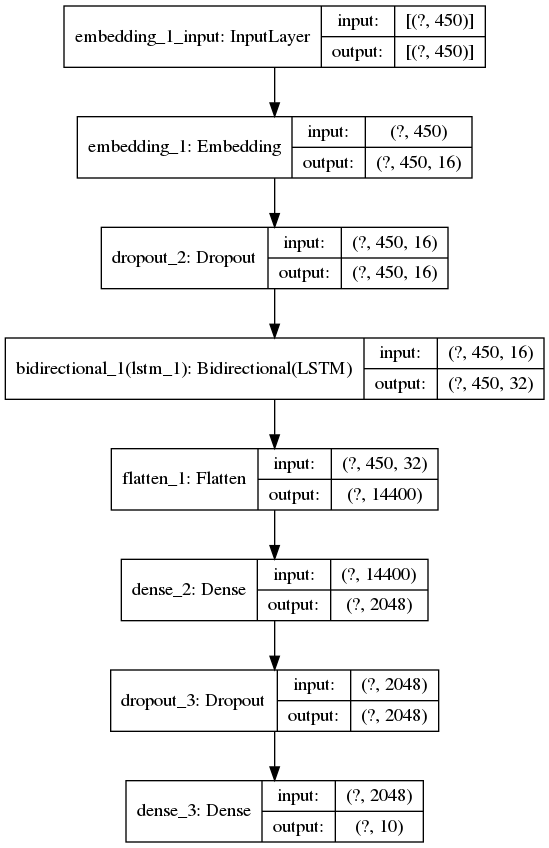

In [51]:
# visualizing the model 

tf.keras.utils.plot_model(model, 'chinese_doc_cls_lstm.png',show_shapes=True)

In [ ]:
history.history.keys()

# history contains our model history, below given are the plots

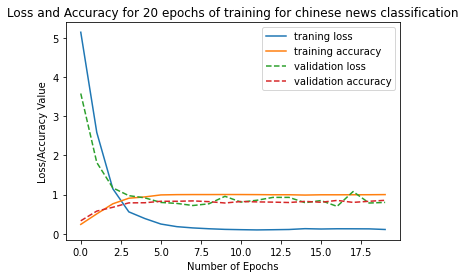

In [52]:
# plot of losses and accuracies over number of epochs

plt.plot(history.history['loss'], label='traning loss')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_loss'], label='validation loss', linestyle='dashed')
plt.plot(history.history['val_accuracy'], label='validation accuracy', linestyle='dashed')
plt.title('Loss and Accuracy for 20 epochs of training for chinese news classification')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy Value')
plt.legend(loc='upper right')
plt.show()

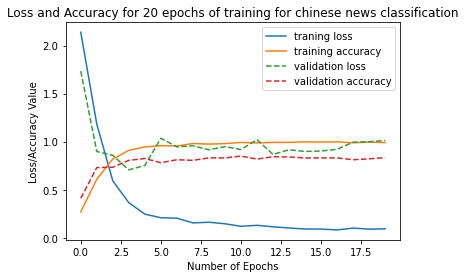

In [84]:
# plot for another training with different hyperparameters

plt.plot(history.history['loss'], label='traning loss')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_loss'], label='validation loss', linestyle='dashed')
plt.plot(history.history['val_accuracy'], label='validation accuracy', linestyle='dashed')
plt.title('Loss and Accuracy for 20 epochs of training for chinese news classification')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy Value')
plt.legend(loc='upper right')
plt.show()

In [54]:
from sklearn.metrics import classification_report

In [58]:
# classification report for lstm model, on test data that was separated earlier

print('Accuracy over test data: ',sum([np.argmax(y) for y in y_test] == model.predict_classes(X_test))/len(true_labels))

true_labels = [np.argmax(y) for y in y_test]
predicted_labels = model.predict_classes(X_test)
print(classification_report(true_labels, predicted_labels))

Accuracy over test data:  0.864
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.83      0.88      0.85        40
           2       0.85      0.90      0.88        39
           3       0.90      0.90      0.90        63
           4       0.59      0.92      0.72        25
           5       1.00      0.81      0.89        31
           6       0.79      0.77      0.78        35
           7       0.97      0.96      0.96        69
           8       0.94      0.74      0.83        23
           9       0.85      0.74      0.79        23

    accuracy                           0.86       375
   macro avg       0.86      0.84      0.85       375
weighted avg       0.88      0.86      0.87       375



> LSTM Results:
> - The accuracy is quite good as compared to other traditional models.
> - **`Precision`** over test set : `0.88`
> - **`Recall`** over test set : `0.86`
> - **`Overall Accuracy over test data : 0.86 (Gotcha!!!!)`***

> Thus **`context based sequence models`** are very good for document classification on chinese data!!
---

> ### ***BERT***

> The **pretrained BERT Chinese** from Google is **`character-based`**, i.e. its *vocabulary is made of single Chinese characters*. Therefore it makes no sense if you use character-level segmentation algorithm to pre-process the data and feed to such model.

> `BERT` has a maximum input length of 512 tokens<br>
> Obviously **transformer based models** have *encoders and decoders hence **out-perform** over **sequence models**, but I don't think that it will work well on chinese data, cosidering its tokenizer which only consider single character at a time.

In [12]:
from transformers import BertTokenizer

In [67]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased') 
# bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') 

In [25]:
# dir(bert_tokenizer)

In [26]:
tokens = bert_tokenizer.tokenize(df['text_cut'][0])
len(tokens)

2792

In [34]:
# [token for token in tokens if token!='[UNK]']

# no use of this tokenizer as it is tokenizing each chinese character
# same thing is done by 'bert-base-multilingual-cased' and 'bert-base-chinese'

In [60]:
chinese_bert_tokenizer = BertTokenizer.from_pretrained('bert-base-chinese') 
chinese_bert_tokenizer

In [10]:
# dir(chinese_bert_tokenizer)

In [9]:
# chinese_bert_tokenizer.vocab

In [61]:
tokens = chinese_bert_tokenizer.tokenize(df['text_cut'][0])

In [62]:
len(tokens)

2789

In [68]:
# def chinese_bert_tokenizing(text):
#     return [token for token in chinese_bert_tokenizer.tokenize(text) if token!='[UNK]']
df['bert_tokens'] = df.text_cut.apply(bert_tokenizer.tokenize)
df.head()

,text,category,text_cut,num_label,chinese_bert_tokens,bert_tokens
0,﻿ 日月 光华 - - Traffic _ Info 精华区 文章 阅读- - - ...,traffic,日月 光华 Traffic Info 精华区 文章 阅读 发信人 RaoRen 亮马 亮马 ...,0,"[日, 月, 光, 华, [UNK], [UNK], 精, 华, 区, 文, 章, 阅, 读...","[日, 月, 光, 华, Traffic, Info, 精, 华, 区, 文, 章, 阅, ..."
1,﻿ 日本 去年 海外 资产 和 负债额 均 创 ...,economic,日本 去年 海外 资产 负债额 均 创 历史纪录 新华社 东京 月 日电 日本 内阁 今天 ...,1,"[日, 本, 去, 年, 海, 外, 资, 产, 负, 债, 额, 均, 创, 历, 史, ...","[日, 本, 去, 年, 海, 外, 资, 产, 负, 债, 额, 均, 创, 历, 史, ..."
2,﻿ 梁斌 黄胄 联袂 在 京 举办 画展新华社 ...,art,梁斌 黄胄 联袂 在 京 举办 画展 新华社 北京 月 日电 记者 尹鸿祝 河北省 蠡县 梁...,2,"[梁, 斌, 黄, 胄, 联, 袂, 在, 京, 举, 办, 画, 展, 新, 华, 社, ...","[梁, 斌, 黄, 胄, 联, 袂, 在, 京, 举, 办, 画, 展, 新, 华, 社, ..."
3,﻿ 记者来信 ： 乱 降价 也 有害新华社 北京...,economic,记者来信 乱 降价 也 有害 新华社 北京 月 日电 记者来信 乱 降价 也 有害 新华社 ...,1,"[记, 者, 来, 信, 乱, 降, 价, 也, 有, 害, 新, 华, 社, 北, 京, ...","[记, 者, 来, 信, 乱, 降, 价, 也, 有, 害, 新, 华, 社, 北, 京, ..."
4,﻿ 巴解 愿同 叙利亚 和解新华社 开罗 ５ 月...,politics,巴解 愿同 叙利亚 解 新华社 开罗 月 日电 巴勒斯坦解放组织 主席 阿拉法特 高级顾问 ...,3,"[巴, 解, 愿, 同, 叙, 利, 亚, 解, 新, 华, 社, 开, 罗, 月, 日, ...","[巴, 解, 愿, 同, 叙, 利, 亚, 解, 新, 华, 社, 开, 罗, 月, 日, ..."


In [65]:
print(len(df['chinese_bert_tokens'][1]))
len([token for token in df['chinese_bert_tokens'][1] if token!='[UNK]'])

234


234

In [84]:
###### tensorflow bert

In [73]:
from transformers import TFBertForSequenceClassification

In [74]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased')

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertForSequenceClassification: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier', 'dropout_37']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
from transformers import BertTokenizer

In [87]:
import tensorflow as tf

In [78]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss)

In [81]:
df.head()

,text,category,text_cut,num_label,chinese_bert_tokens,bert_tokens
0,﻿ 日月 光华 - - Traffic _ Info 精华区 文章 阅读- - - ...,traffic,日月 光华 Traffic Info 精华区 文章 阅读 发信人 RaoRen 亮马 亮马 ...,0,"[日, 月, 光, 华, [UNK], [UNK], 精, 华, 区, 文, 章, 阅, 读...","[日, 月, 光, 华, Traffic, Info, 精, 华, 区, 文, 章, 阅, ..."
1,﻿ 日本 去年 海外 资产 和 负债额 均 创 ...,economic,日本 去年 海外 资产 负债额 均 创 历史纪录 新华社 东京 月 日电 日本 内阁 今天 ...,1,"[日, 本, 去, 年, 海, 外, 资, 产, 负, 债, 额, 均, 创, 历, 史, ...","[日, 本, 去, 年, 海, 外, 资, 产, 负, 债, 额, 均, 创, 历, 史, ..."
2,﻿ 梁斌 黄胄 联袂 在 京 举办 画展新华社 ...,art,梁斌 黄胄 联袂 在 京 举办 画展 新华社 北京 月 日电 记者 尹鸿祝 河北省 蠡县 梁...,2,"[梁, 斌, 黄, 胄, 联, 袂, 在, 京, 举, 办, 画, 展, 新, 华, 社, ...","[梁, 斌, 黄, 胄, 联, 袂, 在, 京, 举, 办, 画, 展, 新, 华, 社, ..."
3,﻿ 记者来信 ： 乱 降价 也 有害新华社 北京...,economic,记者来信 乱 降价 也 有害 新华社 北京 月 日电 记者来信 乱 降价 也 有害 新华社 ...,1,"[记, 者, 来, 信, 乱, 降, 价, 也, 有, 害, 新, 华, 社, 北, 京, ...","[记, 者, 来, 信, 乱, 降, 价, 也, 有, 害, 新, 华, 社, 北, 京, ..."
4,﻿ 巴解 愿同 叙利亚 和解新华社 开罗 ５ 月...,politics,巴解 愿同 叙利亚 解 新华社 开罗 月 日电 巴勒斯坦解放组织 主席 阿拉法特 高级顾问 ...,3,"[巴, 解, 愿, 同, 叙, 利, 亚, 解, 新, 华, 社, 开, 罗, 月, 日, ...","[巴, 解, 愿, 同, 叙, 利, 亚, 解, 新, 华, 社, 开, 罗, 月, 日, ..."


In [144]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.1, random_state=0)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(train_df['bert_tokens'], train_df['num_label'], test_size=0.15, random_state=0)
X_train.shape,y_train.shape

((1912,), (1912,))

In [146]:
from keras.preprocessing.text import Tokenizer
# vocabulary size
vocab = []
for x in train_df['bert_tokens']:
    vocab.append(x)
    
vocab = [item for sublist in vocab for item in sublist]
print('Total number of chinese words:',len(vocab))
print(vocab[0])
vocab = set(vocab)
print('Vocabulary Size:',len(vocab))
vocab_size = len(vocab)   # for bert

Total number of chinese words: 1691608
年
Vocabulary Size: 7696


In [147]:
num_words = vocab_size
tokenizer = Tokenizer(num_words=num_words, oov_token='unk')
tokenizer.fit_on_texts(X_train)

In [148]:
X_train = np.array(tokenizer.texts_to_sequences(X_train))

/home/nilesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [149]:
from keras.preprocessing.sequence import pad_sequences
seq_len = 500

train_X = pad_sequences(X_train, padding='post', maxlen=seq_len)
# valid_X = pad_sequences(valid_X, padding='post', maxlen=seq_len)
# X_test = pad_sequences(X_test, padding='post', maxlen=seq_len)

In [153]:
train_y= tf.keras.utils.to_categorical(y_train, num_classes=10)
train_ds = tf.data.Dataset.from_tensor_slices((train_X,train_y))

## **Conclusion**
---

As we can see that while using `bert_tokenizer`, all the cleaned chinese words are tokenized on characted level. This does not make sense to use bert in this case. As a result more research is necessary on this front, if more time is allocated, I can dig into transformers and their implementation and come up with more ideas to process chinese text/ other language text and fit a model to get our job done. <br>


- Thanks for this opportunity, got to learn so much out of it. I am sure that my interest bucket has need added wtth transformers for NLP and would like to research on the same/

-- <br>
Regards,<br>
Nilesh

---